Introduction 
Zaragoza is a city where you can live very good, with a nice weather, lots of entretainment and nice people. Fortunatley for me is my hometown and I ve been living there for the last 20 years of my life. 
But now I want to discover what is beyond my city, and I have planned to move to París, the french city is the most cosmopolitan city of Europe of the last two centuries. 

1.2 Problem
The problem is that i love my neighborhood in Zaragoza and i really love living in it. For my new life in Paris I want to find a place at least as good as my neighborhood in my town. 

2.1 Data sources
I have found my data mostly in Foursquare and also in the Wikipedia page of nwighborhoods of both cities. 

2.2 Data cleaning
After colecting all the data, I started a little process of cleaning and making it easier to read the data for everyone, in Jupyter Notebook, and also in the Google sheets archive where I located all the data I found. 

In [19]:
import geocoder
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from scipy.spatial import distance
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("ParisZaragoza .xlsx")
df

,Distrito,Nombre,Área (km²),Población (1999),Población (est. 2005),Densidad (2005) (hab/km²),Latitude,Longitude
0,I distrito (D),Louvre,1.826,16 888,17 340,9 496,48859947,2342059
1,II distrito (D),Bourse,0.992,19 585,19 884,20 044,48866888,2340470
2,III distrito (D),Temple,1.171,34 248,35 120,29 991,48864027,2361531
3,IV distrito (D),Hôtel-de-Ville,1.601,30 675,29 290,18 675,48855556,2355556
4,V distrito (I),Panthéon,2.541,58 849,59 300,23 337,48847222,2344444
5,VI distrito (I),Luxembourg,2.154,44 919,45 800,21 263,48850531,2332233
6,VII distrito (I),Palais-Bourbon,4.088,56 985,55 700,13 625,48859167,2312778
7,VIII distrito (D),Élysée,3.881,39 314,39 200,10 100,48874167,2311111
8,IX distrito (D),Opéra,2.179,55 838,58 800,26 985,48878281,2336967
9,X distrito (D),Enclos-St-Laurent,2.892,89 612,89 600,30 982,48875508,2357853


In [3]:
df = df.drop(["Distrito","Nombre"], axis=1)



In [4]:
x = np.array(df[["Latitude", "Longitude"]])

In [5]:
kmeans = KMeans(n_clusters = 5, random_state=100)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=100)

In [6]:
df["cluster"]=kmeans.predict(x)

In [7]:
df.value_counts("cluster")

cluster
2    7
3    5
0    4
4    4
1    1
dtype: int64

In [8]:
df

,Área (km²),Población (1999),Población (est. 2005),Densidad (2005) (hab/km²),Latitude,Longitude,cluster
0,1.826,16 888,17 340,9 496,48859947,2342059,2
1,0.992,19 585,19 884,20 044,48866888,2340470,2
2,1.171,34 248,35 120,29 991,48864027,2361531,2
3,1.601,30 675,29 290,18 675,48855556,2355556,2
4,2.541,58 849,59 300,23 337,48847222,2344444,4
5,2.154,44 919,45 800,21 263,48850531,2332233,4
6,4.088,56 985,55 700,13 625,48859167,2312778,3
7,3.881,39 314,39 200,10 100,48874167,2311111,3
8,2.179,55 838,58 800,26 985,48878281,2336967,2
9,2.892,89 612,89 600,30 982,48875508,2357853,2


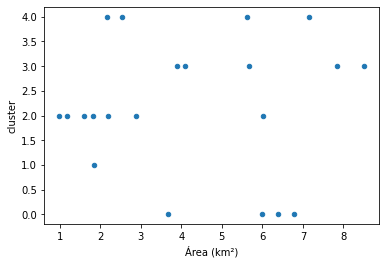

In [9]:
ax1 = df.plot.scatter(x='Área (km²)', y='cluster')

In [10]:
Area= np.array(df[['Área (km²)']]) .reshape(-1,1)
Cluster=np.array(df[['cluster']])

In [11]:
model = LinearRegression().fit(Area,Cluster)

In [13]:
r_sq = model.score(Area,Cluster)

In [14]:
slope = model.coef_
slope

array([[0.00480245]])

In [15]:
intercept = model.intercept_
intercept

array([2.17017759])

In [16]:
Cluster_predicted = model.predict(Area)
Cluster_predicted

array([[2.17894687],
       [2.17494163],
       [2.17580127],
       [2.17786632],
       [2.18238063],
       [2.18052208],
       [2.18981002],
       [2.18881591],
       [2.18064214],
       [2.18406629],
       [2.18778339],
       [2.20080284],
       [2.20449592],
       [2.19717218],
       [2.21100805],
       [2.20785764],
       [2.1974027 ],
       [2.19901632],
       [2.20276704],
       [2.19891547],
       [2.17898529]])

In [17]:
Cluster_new = intercept + slope * Area

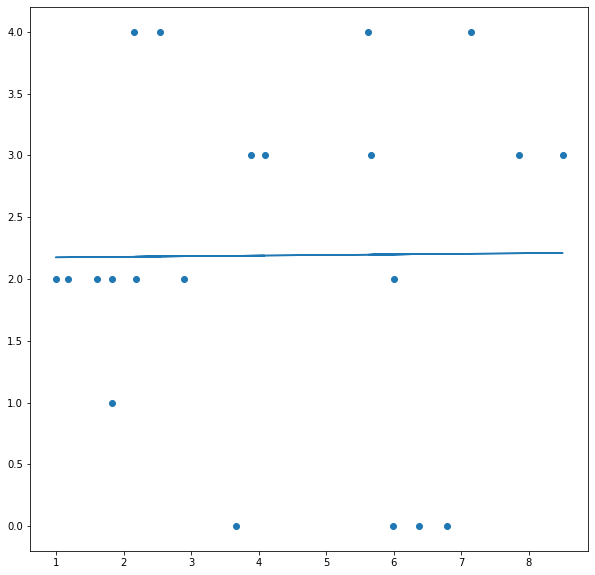

In [20]:
fig,ax = plt.subplots(figsize =(10,10))
plt.scatter(Area,Cluster)
plt.plot(Area, Cluster_new)